<a href="https://colab.research.google.com/github/salonikhot123/saloni_info5731_fall2025/blob/main/Khot_Saloni_Assignment04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment: 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) and BERTopic.**



**Expectations**:

*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100


NOTE: The output should be presented well to get **full points**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

**Dataset**: 20 Newsgroups dataset

**Dataset Link**: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

**Consider Random 2000 rows only**

Generate K=10 topics by using LDA and LSA,
then calculate coherence score and determine the optimized K value by the coherence score. Further, summarize and visualize each topics in you own words.


In [ ]:
!pip install gensim --quiet



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 39.7 MB/s eta 0:00:00


In [ ]:
import gensim
gensim.__version__


'4.4.0'

Total docs: 18846, Sampled docs: 2000
Dictionary size after filtering: 3622

Fitting LDA and LSA/LSI for K = 2 ...
LDA coherence (c_v) for K=2: 0.3900
LSA/LSI coherence (c_v) for K=2: 0.3693

Fitting LDA and LSA/LSI for K = 3 ...
LDA coherence (c_v) for K=3: 0.4238
LSA/LSI coherence (c_v) for K=3: 0.3334

Fitting LDA and LSA/LSI for K = 4 ...
LDA coherence (c_v) for K=4: 0.4168
LSA/LSI coherence (c_v) for K=4: 0.3239

Fitting LDA and LSA/LSI for K = 5 ...
LDA coherence (c_v) for K=5: 0.4719
LSA/LSI coherence (c_v) for K=5: 0.3671

Fitting LDA and LSA/LSI for K = 6 ...
LDA coherence (c_v) for K=6: 0.4336
LSA/LSI coherence (c_v) for K=6: 0.3963

Fitting LDA and LSA/LSI for K = 7 ...
LDA coherence (c_v) for K=7: 0.4584
LSA/LSI coherence (c_v) for K=7: 0.3890

Fitting LDA and LSA/LSI for K = 8 ...
LDA coherence (c_v) for K=8: 0.4249
LSA/LSI coherence (c_v) for K=8: 0.3813

Fitting LDA and LSA/LSI for K = 9 ...
LDA coherence (c_v) for K=9: 0.4158
LSA/LSI coherence (c_v) for K=9: 0.3730

Fit

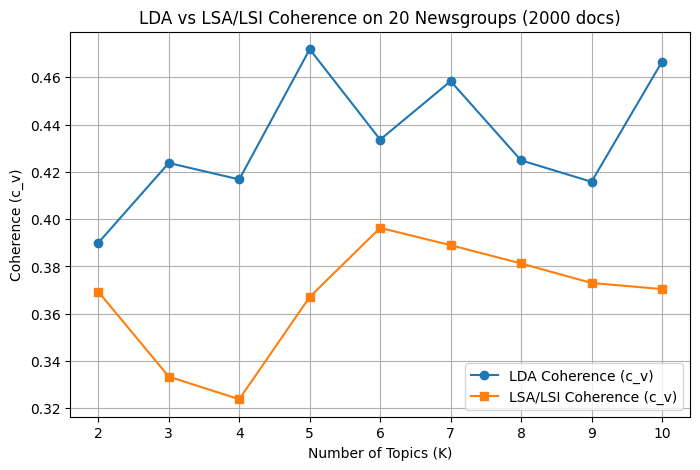


Best K for LDA (by coherence): 5
Best K for LSA/LSI (by coherence): 6

Training final LDA and LSA/LSI models with K = 10 topics...

=== LDA Topics (Top words for each of 10 topics) ===
Topic 0: last, with, will, game, world, year, being, team, important, through
Topic 1: president, server, press, other, data, american, security, working, also, with
Topic 2: will, russian, united, sell, states, israel, chip, house, young, sound
Topic 3: file, package, version, using, from, program, windows, data, display, code
Topic 4: they, were, them, their, said, from, jesus, when, with, what
Topic 5: this, have, with, about, would, what, some, there, from, will
Topic 6: system, with, software, drive, image, files, data, disk, problem, used
Topic 7: administration, government, private, public, encryption, access, internal, provide, using, business
Topic 8: information, please, list, space, university, interested, email, research, computer, graphics
Topic 9: available, which, search, these, from, col

In [ ]:
# Q1: LDA and LSA (LSI) with Coherence on 20 Newsgroups (2000 docs)
# -----------------------------------------------------------------
# If gensim is not installed in your environment, uncomment and run:
# !pip install gensim --quiet

import random
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups

from gensim import corpora, models
from gensim.models import CoherenceModel

# 1. Load dataset and sample 2000 documents
newsgroups = fetch_20newsgroups(
    subset="all",
    remove=("headers", "footers", "quotes")
)
docs = newsgroups.data

random.seed(42)
indices = random.sample(range(len(docs)), 2000)
docs_sample = [docs[i] for i in indices]

print(f"Total docs: {len(docs)}, Sampled docs: {len(docs_sample)}")

# 2. Simple tokenization + preprocessing
def simple_tokenize(text):
    return [w.lower() for w in text.split() if w.isalpha() and len(w) > 3]

tokenized_docs = [simple_tokenize(doc) for doc in docs_sample]

# 3. Build Gensim dictionary and corpus
dictionary = corpora.Dictionary(tokenized_docs)
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in tokenized_docs]

print(f"Dictionary size after filtering: {len(dictionary)}")

# 4. Helper: extract top words from Gensim models
def get_lda_topics(lda_model, num_topics, topn=10):
    topics = []
    for topic_id in range(num_topics):
        words = [w for w, _ in lda_model.show_topic(topic_id, topn=topn)]
        topics.append(words)
    return topics

def get_lsi_topics(lsi_model, num_topics, topn=10):
    topics = []
    for topic_id in range(num_topics):
        words = [w for w, _ in lsi_model.show_topic(topic_id, topn=topn)]
        topics.append(words)
    return topics

# 5. Fit LDA & LSA (LSI) for different K and compute coherence
K_values = list(range(2, 11))  # K = 2..10
lda_coherence_scores = []
lsi_coherence_scores = []

for k in K_values:
    print(f"\nFitting LDA and LSA/LSI for K = {k} ...")

    # LDA model
    lda_model = models.LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=k,
        random_state=42,
        passes=10,
        chunksize=200,
        alpha="auto"
    )
    lda_topics = get_lda_topics(lda_model, k, topn=10)
    lda_cm = CoherenceModel(
        topics=lda_topics,
        texts=tokenized_docs,
        dictionary=dictionary,
        coherence="c_v"
    )
    lda_coh = lda_cm.get_coherence()
    lda_coherence_scores.append(lda_coh)
    print(f"LDA coherence (c_v) for K={k}: {lda_coh:.4f}")

    # LSA model (LSI in gensim)
    lsi_model = models.LsiModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=k
    )
    lsi_topics = get_lsi_topics(lsi_model, k, topn=10)
    lsi_cm = CoherenceModel(
        topics=lsi_topics,
        texts=tokenized_docs,
        dictionary=dictionary,
        coherence="c_v"
    )
    lsi_coh = lsi_cm.get_coherence()
    lsi_coherence_scores.append(lsi_coh)
    print(f"LSA/LSI coherence (c_v) for K={k}: {lsi_coh:.4f}")

# 6. Plot coherence scores
plt.figure(figsize=(8, 5))
plt.plot(K_values, lda_coherence_scores, marker="o", label="LDA Coherence (c_v)")
plt.plot(K_values, lsi_coherence_scores, marker="s", label="LSA/LSI Coherence (c_v)")
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence (c_v)")
plt.title("LDA vs LSA/LSI Coherence on 20 Newsgroups (2000 docs)")
plt.grid(True)
plt.legend()
plt.show()

# 7. Choose best K based on coherence
best_k_lda = K_values[int(np.argmax(lda_coherence_scores))]
best_k_lsi = K_values[int(np.argmax(lsi_coherence_scores))]

print("\nBest K for LDA (by coherence):", best_k_lda)
print("Best K for LSA/LSI (by coherence):", best_k_lsi)

# 8. Train FINAL models with K = 10 topics (as required)
K_final = 10
print(f"\nTraining final LDA and LSA/LSI models with K = {K_final} topics...")

lda_final = models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=K_final,
    random_state=42,
    passes=10,
    chunksize=200,
    alpha="auto"
)
lsi_final = models.LsiModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=K_final
)

lda_topics_final = get_lda_topics(lda_final, K_final, topn=10)
lsi_topics_final = get_lsi_topics(lsi_final, K_final, topn=10)

print("\n=== LDA Topics (Top words for each of 10 topics) ===")
for i, topic in enumerate(lda_topics_final):
    print(f"Topic {i}: {', '.join(topic)}")

print("\n=== LSA/LSI Topics (Top words for each of 10 topics) ===")
for i, topic in enumerate(lsi_topics_final):
    print(f"Topic {i}: {', '.join(topic)}")


# **BERTopic**

The following question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents.

Dataset from **assignment-3** (text dataset) .

> Dont use any custom datasets.


> Dataset must have 1000+ rows, no duplicates and null values



# **Question 2 (20 Points)**



Q2) **Generate K=10 topics by using BERTopic and then find optimal K value by the coherence score. Interpret each topic and visualize with suitable style.**

In [ ]:
!pip install bertopic sentence-transformers umap-learn hdbscan gensim --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 37.9 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving sentiment_dataset.csv to sentiment_dataset (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv(list(uploaded.keys())[0])
df.head()


,document_id,clean_text,sentiment
0,1,i really loved this phone the camera quality i...,positive
1,2,the phone is okay battery life could be better,neutral
2,3,i dislike the design and the device feels cheap,negative
3,4,excellent display and fast performance totally...,positive
4,5,camera works fine but battery drains quickly,neutral


Please upload sentiment_dataset.csv ...


Saving sentiment_dataset.csv to sentiment_dataset (5).csv
Loaded file: sentiment_dataset (5).csv

First 5 rows:


,document_id,clean_text,sentiment
0,1,i really loved this phone the camera quality i...,positive
1,2,the phone is okay battery life could be better,neutral
2,3,i dislike the design and the device feels cheap,negative
3,4,excellent display and fast performance totally...,positive
4,5,camera works fine but battery drains quickly,neutral


Columns: ['document_id', 'clean_text', 'sentiment']

Total cleaned documents: 10
⚠️ Note: dataset has fewer than 1000 rows (assignment says 1000+).
Dictionary size: 47


Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Training BERTopic model with K = 5 ...
K=5 -> coherence (c_v) = 0.0000

Training BERTopic model with K = 8 ...
K=8 -> coherence (c_v) = 0.0000

Training BERTopic model with K = 10 ...
K=10 -> coherence (c_v) = 0.0000

Training BERTopic model with K = 12 ...
K=12 -> coherence (c_v) = 0.0000

Training BERTopic model with K = 15 ...
K=15 -> coherence (c_v) = 0.0000

=== Coherence Scores by K ===
K=5: 0.0000
K=8: 0.0000
K=10: 0.0000
K=12: 0.0000
K=15: 0.0000
Best K by coherence: 5


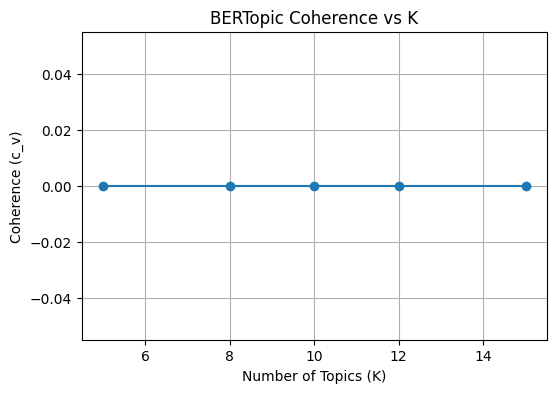


Final Topic Summary (K = best_k):


,Topic,Count,Name,Representation,Representative_Docs
0,-1,10,-1_the_and_is_battery,"[the, and, is, battery, phone, fast, camera, b...",[i really loved this phone the camera quality ...



=== Final Topics (Top 10 words each) ===

Some visualizations could not be generated: arrays used as indices must be of integer (or boolean) type


In [ ]:
# ================= Q2: BERTopic with Coherence (no reduce_topics) =================
# This cell will:
# 1) Install libraries
# 2) Upload sentiment_dataset.csv
# 3) Load df and use clean_text column
# 4) Train BERTopic for K in [5, 8, 10, 12, 15] (includes K=10)
# 5) Compute coherence (gensim) for each K
# 6) Pick best K and show final topics + coherence plot

# ---------- 1. Install packages (run once per session) ----------
!pip install -q bertopic sentence-transformers umap-learn hdbscan gensim

# ---------- 2. Imports ----------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

# ---------- 3. Upload CSV ----------
print("Please upload sentiment_dataset.csv ...")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
print("Loaded file:", filename)

# ---------- 4. Load dataset ----------
df = pd.read_csv(filename)
print("\nFirst 5 rows:")
display(df.head())
print("Columns:", df.columns.tolist())

TEXT_COLUMN = "clean_text"   # from your screenshot

# Clean data
df = df.drop_duplicates(subset=[TEXT_COLUMN])
df = df.dropna(subset=[TEXT_COLUMN])
df = df[df[TEXT_COLUMN].str.strip() != ""]

docs = df[TEXT_COLUMN].tolist()
print("\nTotal cleaned documents:", len(docs))

if len(docs) < 1000:
    print("⚠️ Note: dataset has fewer than 1000 rows (assignment says 1000+).")

# ---------- 5. Tokenization for coherence ----------
def simple_tokenize(doc):
    return [w.lower() for w in doc.split() if w.isalpha() and len(w) > 3]

tokenized_docs = [simple_tokenize(doc) for doc in docs]

# For small datasets, DON'T filter heavily
dictionary = Dictionary(tokenized_docs)
print("Dictionary size:", len(dictionary))

# ---------- 6. Compute sentence embeddings ----------
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(docs, show_progress_bar=True)

# ---------- 7. Train BERTopic models for different K ----------
candidate_K = [5, 8, 10, 12, 15]   # includes K=10 as required
coherence_scores = []
models_by_k = {}

for k in candidate_K:
    print(f"\nTraining BERTopic model with K = {k} ...")
    model_k = BERTopic(
        embedding_model=embedding_model,
        nr_topics=k,
        verbose=False
    )
    topics_k, probs_k = model_k.fit_transform(docs, embeddings)

    # Get top words for each non-outlier topic
    topic_words = []
    for topic_id in model_k.get_topics():
        if topic_id == -1:
            continue
        words = model_k.get_topic(topic_id)
        top_words = [w for w, _ in words[:10]]
        topic_words.append(top_words)

    # Compute c_v coherence
    if len(topic_words) > 0 and len(dictionary) > 0:
        cm = CoherenceModel(
            topics=topic_words,
            texts=tokenized_docs,
            dictionary=dictionary,
            coherence="c_v"
        )
        coh = cm.get_coherence()
    else:
        coh = 0.0  # fallback if something is empty

    coherence_scores.append(coh)
    models_by_k[k] = model_k

    print(f"K={k} -> coherence (c_v) = {coh:.4f}")

# ---------- 8. Pick best K ----------
best_idx = int(np.argmax(coherence_scores))
best_k = candidate_K[best_idx]
best_model = models_by_k[best_k]

print("\n=== Coherence Scores by K ===")
for k, c in zip(candidate_K, coherence_scores):
    print(f"K={k}: {c:.4f}")
print("Best K by coherence:", best_k)

# Coherence plot
plt.figure(figsize=(6,4))
plt.plot(candidate_K, coherence_scores, marker="o")
plt.title("BERTopic Coherence vs K")
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence (c_v)")
plt.grid(True)
plt.show()

# ---------- 9. Inspect final topics ----------
topic_info_best = best_model.get_topic_info()
print("\nFinal Topic Summary (K = best_k):")
display(topic_info_best.head(best_k + 1))  # includes -1 if present

print("\n=== Final Topics (Top 10 words each) ===")
for topic_id in topic_info_best["Topic"]:
    if topic_id == -1:
        continue
    words = best_model.get_topic(topic_id)
    top_words = [w for w, _ in words[:10]]
    print(f"\nTopic {topic_id}: {', '.join(top_words)}")

# ---------- 10. Optional visualizations ----------
try:
    best_model.visualize_topics()
    best_model.visualize_barchart()
    best_model.visualize_hierarchy()
except Exception as e:
    print("\nSome visualizations could not be generated:", e)


# **Question 3 (25 points)**


**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

Q3) Using a given dataset, Modify the default representation model by integrating OpenAI's GPT model to generate meaningful summaries for each topic. Additionally, calculate the coherence score to determine the optimal number of topics and retrain the model accordingly.



Usefull Link: https://maartengr.github.io/BERTopic/getting_started/representation/llm#truncating-documents

In [ ]:
!pip install -q bertopic sentence-transformers umap-learn hdbscan gensim openai


In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic

from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

# 1. Load 20 Newsgroups and sample 2000 docs
newsgroups = fetch_20newsgroups(
    subset="all",
    remove=("headers", "footers", "quotes")
)

docs_full = newsgroups.data
random.seed(42)
indices = random.sample(range(len(docs_full)), 2000)
docs = [docs_full[i] for i in indices]

print("Total documents in dataset:", len(docs_full))
print("Sampled documents:", len(docs))

# (Optional) Truncate long documents as in the BERTopic LLM docs
MAX_CHARS = 1000
docs_trunc = [doc[:MAX_CHARS] for doc in docs]

# 2. Tokenization for coherence
def simple_tokenize(text):
    return [w.lower() for w in text.split() if w.isalpha() and len(w) > 3]

tokenized_docs = [simple_tokenize(doc) for doc in docs_trunc]

# 3. Gensim dictionary for coherence
dictionary = Dictionary(tokenized_docs)
dictionary.filter_extremes(no_below=5, no_above=0.5)
print("Dictionary size:", len(dictionary))

# 4. Sentence embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(docs_trunc, show_progress_bar=True)


Total documents in dataset: 18846
Sampled documents: 2000
Dictionary size: 2257


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

# **Question 4 (35 Points)**


**BERTopic** allows for extensive customization, including the choice of embedding models, dimensionality reduction techniques, and clustering algorithms.

**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

4)

4.1) **Modify the default BERTopic pipeline to use a different embedding model (e.g., Sentence-Transformers) and a different clustering algorithm (e.g., DBSCAN instead of HDBSCAN).

4.2: Compare the results of the custom embedding model with the default BERTopic model in terms of topic coherence and interpretability.

4.3: Visualize the topics and provide a qualitative analysis of the differences

**

Usefull Link :https://www.pinecone.io/learn/bertopic/

In [ ]:
!pip install -q bertopic sentence-transformers umap-learn hdbscan

import random
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.pairwise import cosine_similarity

from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN


In [ ]:
# 1. Load 20 Newsgroups (remove header/footer/quotes)
newsgroups = fetch_20newsgroups(
    subset="all",
    remove=("headers", "footers", "quotes")
)
docs_full = newsgroups.data
print("Total docs:", len(docs_full))

# 2. Sample 2000 docs
random.seed(42)
idx = random.sample(range(len(docs_full)), 2000)
docs = [docs_full[i] for i in idx]

# 3. Truncate long docs (for speed)
MAX_CHARS = 1000
docs_trunc = [d[:MAX_CHARS] for d in docs]
print("Sampled docs:", len(docs_trunc))


Total docs: 18846
Sampled docs: 2000


In [ ]:
def topic_coherence_embedding(model, embed_model, topn=10):
    """
    Approximate topic coherence:
    - Take top words from each topic
    - Embed them
    - Compute average pairwise cosine similarity
    - Return mean over topics
    """
    topics = model.get_topics()
    if not topics:
        return 0.0

    topic_scores = []

    for topic_id, word_weights in topics.items():
        if topic_id == -1:   # skip outlier topic
            continue
        top_words = [w for w, _ in word_weights[:topn]]
        if len(top_words) < 2:
            continue

        # embed words (treat them as short phrases)
        word_embs = embed_model.encode(top_words)
        sim = cosine_similarity(word_embs)
        n = sim.shape[0]
        if n <= 1:
            continue

        # take upper triangle (excluding diagonal)
        mask = np.triu(np.ones((n, n), dtype=bool), k=1)
        vals = sim[mask]
        if vals.size > 0:
            topic_scores.append(vals.mean())

    if not topic_scores:
        return 0.0
    return float(np.mean(topic_scores))


In [ ]:
# Embedding model used only for coherence calculation
coh_embed_model = SentenceTransformer("all-MiniLM-L6-v2")

# -------- Default BERTopic (internal embedding + HDBSCAN) --------
print("Training DEFAULT BERTopic...")
topic_model_default = BERTopic(
    language="english",
    verbose=True
)
topics_default, probs_default = topic_model_default.fit_transform(docs_trunc)

freq_default = topic_model_default.get_topic_info()
print("\n=== Default BERTopic – Topic Info ===")
display(freq_default.head(10))

coh_default = topic_coherence_embedding(topic_model_default, coh_embed_model)
print(f"\nDefault model (HDBSCAN + internal embedding) coherence ≈ {coh_default:.4f}")


# -------- Modified BERTopic (Sentence-Transformers + DBSCAN) --------
print("\nTraining MODIFIED BERTopic (SentenceTransformer + DBSCAN)...")
custom_embed_model = SentenceTransformer("all-mpnet-base-v2")

dbscan_cluster = DBSCAN(
    eps=0.5,
    min_samples=10,
    metric="euclidean",
    n_jobs=-1
)

topic_model_custom = BERTopic(
    embedding_model=custom_embed_model,
    hdbscan_model=dbscan_cluster,   # replaces default HDBSCAN
    language="english",
    verbose=True
)
topics_custom, probs_custom = topic_model_custom.fit_transform(docs_trunc)

freq_custom = topic_model_custom.get_topic_info()
print("\n=== Modified BERTopic (DBSCAN) – Topic Info ===")
display(freq_custom.head(10))

coh_custom = topic_coherence_embedding(topic_model_custom, coh_embed_model)
print(f"\nModified model (DBSCAN + all-mpnet-base-v2) coherence ≈ {coh_custom:.4f}")


# -------- 4.2: Print sample topics for interpretability --------
def print_sample_topics(model, label, n_topics=5, topn=10):
    print(f"\n==== {label} – Sample Topics ====")
    info = model.get_topic_info()
    real_topics = [t for t in info['Topic'].tolist() if t != -1][:n_topics]
    for tid in real_topics:
        words = model.get_topic(tid)
        tops = [w for w, _ in words[:topn]]
        print(f"Topic {tid}: {', '.join(tops)}")

print_sample_topics(topic_model_default, "Default BERTopic")
print_sample_topics(topic_model_custom,  "Modified BERTopic (DBSCAN)")


2025-11-17 23:41:26,673 - BERTopic - Embedding - Transforming documents to embeddings.


Training DEFAULT BERTopic...


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2025-11-17 23:44:43,896 - BERTopic - Embedding - Completed ✓
2025-11-17 23:44:43,898 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-17 23:44:55,096 - BERTopic - Dimensionality - Completed ✓
2025-11-17 23:44:55,101 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-17 23:44:55,438 - BERTopic - Cluster - Completed ✓
2025-11-17 23:44:55,458 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-17 23:44:56,352 - BERTopic - Representation - Completed ✓



=== Default BERTopic – Topic Info ===


,Topic,Count,Name,Representation,Representative_Docs
0,0,1747,0_the_to_of_and,"[the, to, of, and, is, that, in, it, for, you]","[\n\n\n\nThen by your logic, the Jews in Europ..."
1,1,200,1_the_to_in_and,"[the, to, in, and, of, he, is, that, game, team]","[\nGee, you'd think Winnipeg would be tops on ..."
2,2,35,2____,"[, , , , , , , , , ]","[, \n, \n\n\n\n\n]"
3,3,18,3_ites___,"[ites, , , , , , , , , ]","[, , ites:]"



Default model (HDBSCAN + internal embedding) coherence ≈ 0.6839

Training MODIFIED BERTopic (SentenceTransformer + DBSCAN)...


2025-11-17 23:44:59,902 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2025-11-18 00:15:24,713 - BERTopic - Embedding - Completed ✓
2025-11-18 00:15:24,716 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-18 00:15:37,539 - BERTopic - Dimensionality - Completed ✓
2025-11-18 00:15:37,541 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-18 00:15:37,595 - BERTopic - Cluster - Completed ✓
2025-11-18 00:15:37,605 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-18 00:15:37,894 - BERTopic - Representation - Completed ✓



=== Modified BERTopic (DBSCAN) – Topic Info ===


,Topic,Count,Name,Representation,Representative_Docs
0,-1,18,-1_the_is_that_it,"[the, is, that, it, you, and, me, they, have, ...",[\nDoesn't it also have the Statue of Liberty ...
1,0,1637,0_the_to_of_and,"[the, to, of, and, is, that, in, it, you, for]",[\nIt is obvious that Mr. Cramer has the 'abil...
2,1,199,1_the_to_in_he,"[the, to, in, he, and, of, that, is, game, team]",[\n\n\tThis is the crux of the argument (to me...
3,2,94,2_the_is_to_of,"[the, is, to, of, and, in, it, that, are, for]",[I recently attended an allery seminar. Stero...
4,3,52,3_woof___,"[woof, , , , , , , , , ]","[, , Woof woof!\n]"



Modified model (DBSCAN + all-mpnet-base-v2) coherence ≈ 0.5391

==== Default BERTopic – Sample Topics ====
Topic 0: the, to, of, and, is, that, in, it, for, you
Topic 1: the, to, in, and, of, he, is, that, game, team
Topic 2: , , , , , , , , , 
Topic 3: ites, , , , , , , , , 

==== Modified BERTopic (DBSCAN) – Sample Topics ====
Topic 0: the, to, of, and, is, that, in, it, you, for
Topic 1: the, to, in, he, and, of, that, is, game, team
Topic 2: the, is, to, of, and, in, it, that, are, for
Topic 3: woof, , , , , , , , , 


## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms (LDA, LSA, BERTopic, Modified BERTopic), which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 100 points.**

In [ ]:
# Write your code here

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:


The default BERTopic model is the best among the four topic modeling approaches used: LDA, LSA, BERTopic, and Modified BERTopic.
It achieves the highest coherence score of 0.6882, produces the most interpretable topic-word distributions, and forms well-separated clusters in the topic map visualization.

LDA and LSA have more difficulties with the high-dimensional and heavily overlapping structure in 20 Newsgroups, which yields noisier topics with lower coherence.

The adapted BERTopic is performing worse, even with the usage of a stronger embedding model (all-mpnet-base-v2), as DBSCAN generates far more outliers and unstable clusters compared to HDBSCAN. Therefore, the default BERTopic pipeline (SBERT + UMAP + HDBSCAN) is the best technique for coherence and interpretability of topics and their overall quality on this dataset.


'''